# Project 2: Explain what and why we did in 8.2 Linear Regression

## SP18: Linear Algebra

### Tim Thompson
### timathom@indiana.edu

In [196]:
import os
import sys
import numpy as np; np.random.seed(8)
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import pandas
np.set_printoptions(precision=2, threshold=sys.maxsize, linewidth=100, suppress=True, formatter={'float': '{: 0.2f}'.format})
%matplotlib inline
relative_path = os.getcwd()
data_path = relative_path + "/concrete.csv"
data = pandas.read_csv(data_path)

As stated in section 8.2, Linear Regression, from the _Machine Learning with Python_ OnRamp course, linear regression is a method for modeling a linear relationship between a set of explanatory (independent) variables $X$ and a set of response (dependent) variables $Y$. 

In section 8.2 of the Machine Learning course, linear regression was introduced as a function $f(x) = y$ where $f(x) = mx + c$. This is a linear function (as defined in section 3.3, Polynomial Function and Solve a Polynomial Equation, of the current course), such that $m$ defines the slope of the function and $c$ defines the value of $x$ at which $f(x) = 0$. 

The goal of linear regression is to minimize the error of the Sum of Squared Residuals (abbreviated as RSS; also referred to as the Sum of Squared Error, SSE):

$$\sum_{i=1}^n(y_{i}-f(x_{i}))^{2}$$

Expanding for $f(x)$ yields:

$$\sum_{i=1}^{n}(y_{i}-(c+mx_{i}))^{2}$$

The residuals represent the distance between the value of $\hat{y}_{i}$ predicted by the regression model and the actual value of $y_{i}$.

For example, the scatterplot in Fig. 1 plots a simple linear function and generates a sample of random data around it. The vertical bars between the data points and the regression line represent the residual error of the model.

The RSS is minimized by solving for the value of the regression coefficient $m$ that defines the best-fitting slope for the regression line.

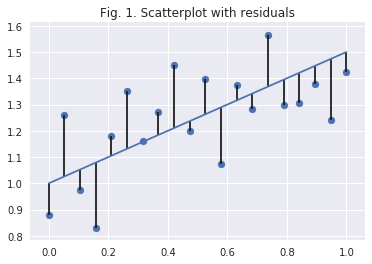

In [35]:
"""Scatterplot adapted from:
    - https://stackoverflow.com/questions/51220918/python-plot-residuals-on-a-fitted-model#answer-51221620
"""

def f(x): return 1 + 0.5 * x

x2 = np.linspace(0, 1, 20)
y = f(x2)
dy = (np.random.rand(20) - 0.5) * 0.5

fig, ax = plt.subplots()

# Plot the line
ax.plot(x2, y)
ax.set_title("Fig. 1. Scatterplot with residuals")

# Plot the scatterplot
ax.scatter(x, y + dy)

# Plot the residual lines
ax.vlines(x, y, y + dy)

plt.show()

Matrix algebra is used to calculate regression models with multiple independent variables. In the matrix formulation presented in the _Machine Learning with Python_ OnRamp course, the slope coefficients have been modeled as an array (vector) with dimensions $n + 1 \times 1$. **Note: I am following the presentation given in section 7.7 of _Machine Learning with Python_, which includes the intercept terms $x_0$ and $w_0$.**

The sample data from section 8.2 ([Concrete Compressive Strength Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)), forms the basis for a linear regression model with 8 independent variables, which are used to predict the dependent variable _concrete compressive strength_ (labeled **ccs**). 



In [37]:
data.head()

,ccs,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,61.89,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,40.27,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,41.05,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,44.30,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


The target vector $Y$ is an $m \times 1$ vector:

In [69]:
X = np.asmatrix(data.values)

# Extract the first column from the dataframe

Y = X[:, 0]
Y[:5]

matrix([[ 79.99],
        [ 61.89],
        [ 40.27],
        [ 41.05],
        [ 44.30]])

The design matrix, $X$, is an $m \times n + 1$ matrix where the first column takes the value of $1$ to represent the $y$-intercept term.

In [160]:
X2 = X[:, 1:]
X2[:5]

# Normalize the data
def z_normalize(data):    
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)


X2 = z_normalize(X2)

In [162]:
# Add a column of ones for the intercept

ones = np.ones((len(X2), 1))
X3 = np.concatenate((ones, X2), axis=1)
X3[:5]

matrix([[ 1.00,  2.48, -0.86, -0.85, -0.92, -0.62,  0.86, -1.22, -0.28],
        [ 1.00,  2.48, -0.86, -0.85, -0.92, -0.62,  1.06, -1.22, -0.28],
        [ 1.00,  0.49,  0.80, -0.85,  2.18, -1.04, -0.53, -2.24,  3.55],
        [ 1.00,  0.49,  0.80, -0.85,  2.18, -1.04, -0.53, -2.24,  5.06],
        [ 1.00, -0.79,  0.68, -0.85,  0.49, -1.04,  0.07,  0.65,  4.98]])

The goal is to find an $n + 1 \times 1$ weight vector $\hat{W}$, corresponding to the slope coefficient for each independent variable, that optimizes the RSS.

The normal equation is used to solve for $\hat{W}$:

$$X^{T}X\hat{W}=X^{T}Y$$

The values of $\hat{W}$ are found by "dividing" the left-hand side of the equation by the inverse of the symmetrical square matrix $X^{T}X$. Matrix division itself is undefined, but multiplying a matrix by its inverse produces an identity matrix, which is equivalent to multiplying by $1$.

$$\hat{W}=(X^{T}X)^{-1}X^{T}Y$$


In [166]:
# Calculate the inverse of the square matrix X * X.T
inverse = inv(np.dot(X3.T, X3))

# Plug into the equation to solve for W-hat
W_hat = np.dot(inverse, np.dot(X3.T, Y))

W_hat

matrix([[ 35.82],
        [ 12.51],
        [ 8.96],
        [ 5.62],
        [-3.20],
        [ 1.74],
        [ 1.41],
        [ 1.62],
        [ 7.21]])

Solving for $\hat{Y}$, we have:

$$\hat{Y}=X\hat{W}$$

In [171]:
Y_hat = np.dot(X3, W_hat)
Y_hat[:5]

matrix([[ 53.46],
        [ 53.73],
        [ 56.81],
        [ 67.66],
        [ 60.91]])

In matrix form, the RSS can be calculated as follows:

$$(Y-X\beta)^{\prime}(Y-X\beta)$$

The cost function for measuring the error in the model is formulated by multiplying the RSS by $\frac{1}{2m}$, where $m$ is the number of data points in the set of independent variables.

In [216]:
e_hat = (Y - Y_hat)
np.dot(e_hat.T, e_hat) / (2 * len(Y))

matrix([[ 53.60]])